# Cell Division 

## On a 2D mesh

In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pylab as plt
%matplotlib inline

from tyssue.core.sheet import Sheet

from tyssue import config

from tyssue.geometry.planar_geometry import PlanarGeometry as geom
from tyssue.solvers.sheet_vertex_solver import Solver as solver
from tyssue.dynamics.planar_vertex_model import PlanarModel as model

from tyssue.draw.plt_draw import sheet_view
from tyssue.stores import load_datasets

from tyssue.topology.sheet_topology import remove_face, cell_division
from tyssue.core.objects import get_opposite

/home/guillaume/anaconda3/envs/py36/lib/python3.6/site-packages/tyssue-0.2rc1-py3.6.egg/tyssue/core/generation.py:3: UserWarning: generation should not be imported from core anymore but from its own module
  warnings.warn('generation should not be imported from core anymore but from its own module')


Reseting datasets values with new specs


Number of cells: 20
          edges: 116
          vertices: 54



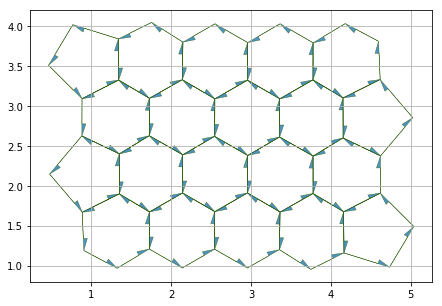

In [2]:
sheet = Sheet.planar_sheet_2d('division', 6, 6, 1, 1)
sheet.sanitize()
geom.update_all(sheet)

sheet.edge_df['opposite'] = get_opposite(sheet.edge_df)

# ## Set up the model
nondim_specs = config.dynamics.quasistatic_plane_spec()
dim_model_specs = model.dimentionalize(nondim_specs)
sheet.update_specs(dim_model_specs, reset=True)

print("Number of cells: {}\n"
      "          edges: {}\n"
      "          vertices: {}\n".format(sheet.Nf, sheet.Ne, sheet.Nv))

# ## Minimize energy
res = solver.find_energy_min(sheet, geom, model)

# ## View the result
draw_specs = config.draw.sheet_spec()
draw_specs['vert']['visible'] = False
draw_specs['edge']['head_width'] = 0.1
fig, ax = sheet_view(sheet, **draw_specs)
fig.set_size_inches(12, 5)

True


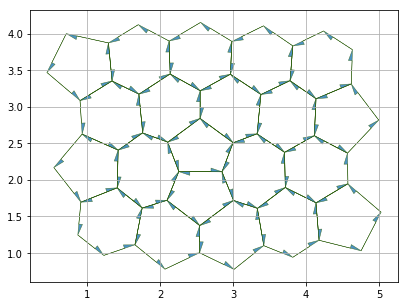

In [3]:
daughter = cell_division(sheet, 7, geom, angle=np.pi/2)

res = solver.find_energy_min(sheet, geom, model)
print(res['success'])

fig, ax = sheet_view(sheet, **draw_specs)
fig.set_size_inches(12, 5)

## Division in a 3D single layer epithelium

In [4]:
from tyssue.io.hdf5 import save_datasets, load_datasets
# redefine cell_division from monolayer related topology module
from tyssue.topology.monolayer_topology import cell_division

from tyssue import Monolayer, MonoLayerGeometry
from tyssue.geometry.bulk_geometry import BulkGeometry
from tyssue.dynamics.bulk_model import BulkModel, set_model
from tyssue.draw.threejs_draw import view_3js


In [25]:
datasets = load_datasets('../examples/small_ellipsoid.hf5',
                         data_names=['vert', 'edge',
                                     'face', 'cell'])
specs = config.geometry.bulk_spec()

monolayer = Monolayer('ell', datasets, specs)

# ## Settings for the quasi-static model
# ### Apical layer
apical_spec = {
    'edge': {
        'line_tension': 0.12,},
    'face': {
        'contractility': 0.04,
        'prefered_area': 0.8,
        'area_elasticity': 1.0},
    'cell': {
        'prefered_vol': 1.0,
        'vol_elasticity': 1.0},
    'settings': {
        'grad_norm_factor': 1.0,
        'nrj_norm_factor': 1.0},}

# ### Modifier for each segment of the stratum
modifiers = {
    'sagittal': {
        'edge': {
            'line_tension': 0.1},
        'face': {
            'contractility': 0.05,
            'prefered_area': 0.2}
    },
    'basal': {
        'edge': {
            'line_tension': 0.5},
        'face': {
            'contractility': 0.1,
            'prefered_area': 0.2}},
    }

set_model(monolayer, BulkModel, apical_spec, modifiers)


In [6]:
mother = 8
daughter = cell_division(monolayer, mother, 
                         orientation='vertical')

ERROR:root:An unexpected error occurred while tokenizing input
The following traceback may be corrupted or invalid
The error message is: ('EOF in multi-line string', (1, 62))



ValueError: 
An invalid epithelium was produced

To see which edges are invalid, you can inspect
the 'is_valid' column of the `edge_df` dataframe,
or for example the bad cells involved:

>>> bad_edges = eptm.edge_df[~eptm.edge_df['is_valid']].index
>>> bad_cells = eptm.edge_df.loc[bad_edges, 'cell'].unique()

If case the epithelium was restored after being invalidated, you can find the
invalid epithelium as the `_bad` attribute of the restored one

In [7]:
rho = np.linalg.norm(monolayer._bad.vert_df[monolayer.coords], axis=1)
rho = pd.Series(rho, index=monolayer._bad.vert_df.index)

colors = plt.cm.viridis(rho / rho.max())
draw_specs['edge']['color'] = colors
draw_specs['face']['color'] = '#aaaaaaaa'
renderer, line = view_3js(monolayer._bad, **draw_specs)
display(renderer)

Renderer(camera=PerspectiveCamera(position=[0.0, 5.0, 5.0], scale=[1.0, 1.0, 1.0], up=[0.0, 1.0, 0.0]), controls=[OrbitControls(controlling=PerspectiveCamera(position=[0.0, 5.0, 5.0], scale=[1.0, 1.0, 1.0], up=[0.0, 1.0, 0.0]), target=[0.0, 0.0, 0.0])], effect=None, scene=Scene(children=[DirectionalLight(color='#ccaabb', position=[0.0, 5.0, 0.0], scale=[1.0, 1.0, 1.0], up=[0.0, 1.0, 0.0]), AmbientLight(color='#cccccc', position=[0.0, 0.0, 0.0], scale=[1.0, 1.0, 1.0], up=[0.0, 1.0, 0.0]), Line(geometry=PlainGeometry(colors=['#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a4b', '#000a

In [9]:
eptm = monolayer._bad
invalid_edges = eptm.get_invalid()
eptm.edge_df['is_valid'] = ~invalid_edges

bad_edges = eptm.edge_df[~eptm.edge_df['is_valid']].index
bad_cells = eptm.edge_df.loc[bad_edges, 'cell'].unique()


In [10]:
bad_cells

array([48,  8])

In [11]:
from tyssue.topology.bulk_topology import get_division_edges, get_division_vertices

In [13]:
ab_axis

dx   -0.150730
dy   -0.383496
dz   -0.123258
dtype: float64

In [19]:
from tyssue.geometry.utils import rotation_matrix
from tyssue.topology.base_topology import add_vert, close_face


def get_division_edges(eptm, mother,
                       plane_normal,
                       plane_center=None):
    """
    """
    plane_normal = np.asarray(plane_normal)
    if plane_center is None:
        plane_center = eptm.cell_df.loc[mother, eptm.coords]

    n_xy = np.linalg.norm(plane_normal[:2])
    theta = -np.arctan2(n_xy, plane_normal[2])
    direction = [plane_normal[1], -plane_normal[0], 0]
    rot = rotation_matrix(theta, direction)
    cell_verts = set(eptm.edge_df[eptm.edge_df['cell'] == mother]['srce'])
    vert_pos = eptm.vert_df.loc[cell_verts, eptm.coords]
    for c in eptm.coords:
        vert_pos[c] -= plane_center[c]
    vert_pos[:] = np.dot(vert_pos, rot)
    
    mother_edges = eptm.edge_df[eptm.edge_df['cell'] == mother]
    srce_z = vert_pos.loc[mother_edges['srce'], 'z']
    srce_z.index = mother_edges.index
    trgt_z = vert_pos.loc[mother_edges['trgt'], 'z']
    trgt_z.index = mother_edges.index
    division_edges = mother_edges[((srce_z < 0) &
                                   (trgt_z >= 0))]

    # Order the returned edges so that their centers
    # are oriented counterclockwize in the division plane
    # in preparation for septum creation
    srce_pos = vert_pos.loc[division_edges['srce'],
                            eptm.coords].values
    trgt_pos = vert_pos.loc[division_edges['trgt'],
                            eptm.coords].values
    centers = (srce_pos + trgt_pos)/2
    theta = np.arctan2(centers[:, 2], centers[:, 1])
    return division_edges.index[np.argsort(theta)]



def get_division_vertices(eptm,
                          division_edges=None,
                          mother=None,
                          plane_normal=None,
                          plane_center=None):

    if division_edges is None:
        division_edges = get_division_edges(eptm, mother,
                                            plane_normal,
                                            plane_center)
    vertices = []
    for edge in division_edges:
        new_vert, *new_edges = add_vert(eptm, edge)
        vertices.append(new_vert)
    return vertices


In [30]:
mother = 10
ab_axis = MonoLayerGeometry.basal_apical_axis(monolayer, mother)
plane_normal = np.asarray(ab_axis)

edges = get_division_edges(monolayer, mother, plane_normal)

#h_vertices = get_division_vertices(monolayer,
#                                   mother=mother,
#                                   plane_normal=plane_normal)


In [31]:
monolayer.edges

Int64Index([793, 781, 1613, 777, 785, 789], dtype='int64')

In [27]:
h_vertices

[184, 185, 186, 187, 188, 189]

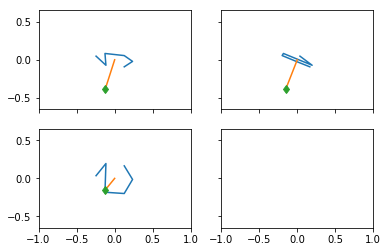

In [28]:
fig, [[ax_zy, ax_xy],
      [ax_zx, _]] = plt.subplots(2, 2, 
                               sharex=True,
                               sharey=True)
h_vs = monolayer.vert_df.loc[h_vertices, list('xyz')]
for c in 'xyz':
    h_vs[c] -= h_vs[c].mean()
    
ax_xy.plot(h_vs.x, h_vs.y)
ax_zy.plot(h_vs.z, h_vs.y)
ax_zx.plot(h_vs.z, h_vs.x)
for ax in ax_zy, ax_zx, ax_xy,:
    ax.set(aspect='equal',
           xlim=(-1., 1.),
           ylim=(-1., 1.))
    
ax_xy.plot([0, ab_axis.dx],
           [0, ab_axis.dy],)
ax_zy.plot([0, ab_axis.dz],
           [0, ab_axis.dy],)
ax_zx.plot([0, ab_axis.dz],
           [0, ab_axis.dx],)

ax_xy.plot([ab_axis.dx],
           [ab_axis.dy], 'd')
ax_zy.plot([ab_axis.dz],
           [ab_axis.dy], 'd')
ax_zx.plot([ab_axis.dz],
           [ab_axis.dx], 'd')

In [21]:
def cell_division(eptm, mother, geom, vertices):

    cell_cols = eptm.cell_df.loc[mother]
    eptm.cell_df = eptm.cell_df.append(cell_cols,
                                       ignore_index=True)
    eptm.cell_df.index.name = 'cell'
    daughter = eptm.cell_df.index[-1]

    pairs = set([frozenset([v1, v2]) for v1, v2
                 in itertools.product(vertices,
                                      vertices) if v1 != v2])
    daughter_faces = []

    # devide existing faces
    for v1, v2 in pairs:
        v1_faces = eptm.edge_df[eptm.edge_df['srce'] == v1]['face']
        v2_faces = eptm.edge_df[eptm.edge_df['srce'] == v2]['face']
        # we should devide a face if both v1 and v2
        # are part of it
        faces = set(v1_faces).intersection(v2_faces)
        for face in faces:
            daughter_faces.append(
                face_division(eptm, face, v1, v2))
    # septum
    face_cols = eptm.face_df.iloc[-2:]
    eptm.face_df = eptm.face_df.append(face_cols, ignore_index=True)
    eptm.face_df.index.name = 'face'
    septum = eptm.face_df.index[-2:]
    daughter_faces.extend(list(septum))

    num_v = len(vertices)
    num_new_edges = num_v*2

    edge_cols = eptm.edge_df.iloc[-num_new_edges:]
    eptm.edge_df = eptm.edge_df.append(edge_cols,
                                       ignore_index=True)
    eptm.edge_df.index.name = 'edge'
    new_edges = eptm.edge_df.index[-num_new_edges:]

    # To keep mother orientation, the first septum face
    # belongs to mother
    for v1, v2, edge, oppo in zip(vertices,
                                  np.roll(vertices, -1),
                                  new_edges[:num_v],
                                  new_edges[num_v:]):
        # Mother septum
        eptm.edge_df.loc[edge,
                         ['srce', 'trgt',
                          'face', 'cell']] = (v1, v2,
                                              septum[0], mother)
        # Daughter septum
        eptm.edge_df.loc[oppo,
                         ['srce', 'trgt',
                          'face', 'cell']] = (v2, v1,
                                              septum[1], daughter)

    eptm.reset_index()
    eptm.reset_topo()
    geom.update_all(eptm)

    m_septum_edges = eptm.edge_df[eptm.edge_df['face'] == septum[0]]
    m_septum_norm = m_septum_edges[eptm.ncoords].mean()
    m_septum_pos = eptm.face_df.loc[septum[0], eptm.coords]

    # splitting the faces between mother and daughter
    # based on the orientation of the vector from septum
    # center to each face center w/r to the septum norm
    mother_faces = set(eptm.edge_df[eptm.edge_df['cell'] == mother]['face'])
    for face in mother_faces:
        if face == septum[0]:
            continue
        dr = eptm.face_df.loc[face, eptm.coords] - m_septum_pos
        proj = (dr.values * m_septum_norm).sum(axis=0)
        f_edges = eptm.edge_df[eptm.edge_df['face'] == face].index
        if proj < 0:
            eptm.edge_df.loc[f_edges, 'cell'] = mother
        else:
            eptm.edge_df.loc[f_edges, 'cell'] = daughter
    eptm.reset_index()
    eptm.reset_topo()
    return daughter


In [18]:
eptm.edge_df.loc[bad_edges, ['face', 'srce', 'trgt']]

,face,srce,trgt
edge,,,
45,374,13,184
46,374,21,13
47,8,14,20
48,8,20,23
49,374,22,21
50,8,23,185
321,375,106,186
322,56,105,113
323,375,112,106


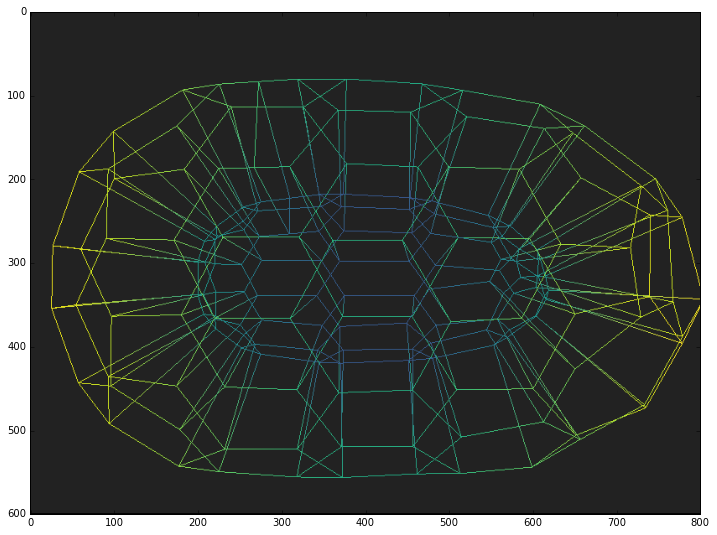

In [25]:

rho = np.linalg.norm(monolayer.vert_df[monolayer.coords], axis=1)
rho = pd.Series(rho, index=monolayer.vert_df.index)

colors = plt.cm.viridis(rho / rho.max())
draw_specs['edge']['color'] = colors
draw_specs['face']['color'] = '#aaaaaaaa'

canvas, view = vp_view(monolayer, coords=['z', 'x', 'y'], **draw_specs)

fig, ax = plt.subplots()
ax.imshow(canvas.render())
fig.set_size_inches(12, 12)


In [27]:
res = solver.find_energy_min(monolayer, BulkGeometry, BulkModel)

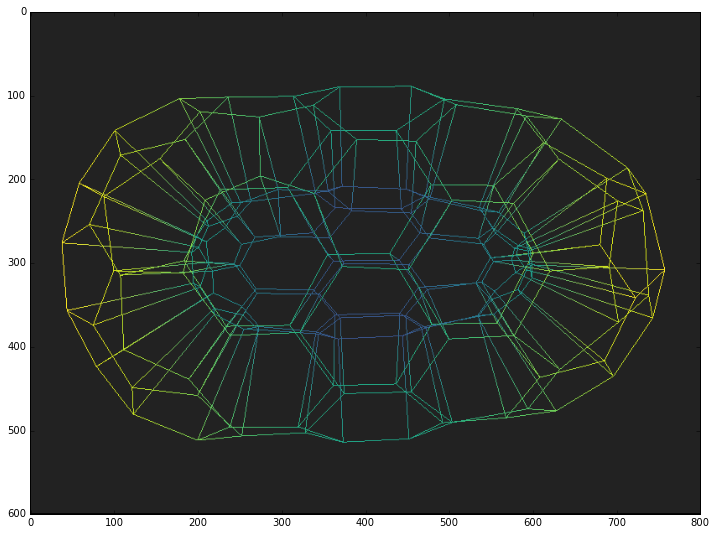

In [28]:
rho = np.linalg.norm(monolayer.vert_df[monolayer.coords], axis=1)
rho = pd.Series(rho, index=monolayer.vert_df.index)

colors = plt.cm.viridis(rho / rho.max())
draw_specs['edge']['color'] = colors
draw_specs['face']['color'] = '#aaaaaaaa'

canvas, view = vp_view(monolayer, coords=['z', 'x', 'y'], **draw_specs)

fig, ax = plt.subplots()
ax.imshow(canvas.render())
fig.set_size_inches(12, 12)